# Importing required packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sp
from sklearn import datasets, manifold

from dmap_nn_dist import *
from dmap_nn_points import *

# TASK 2.1

Defining and visualizing the input signal

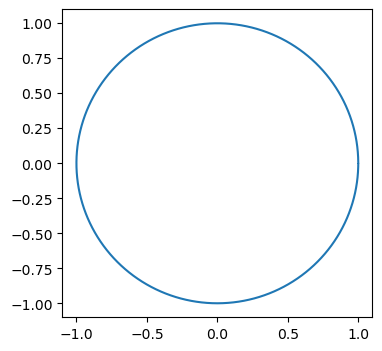

In [2]:
N = 1000
tk = np.linspace(1, N, N)
X = np.array((np.cos(2*np.pi*tk/(N+1)),np.sin(2*np.pi*tk/(N+1))))
X = X.transpose()

fig = plt.figure(figsize=(4,4))
plt.plot(X[:,0],X[:,1])

plt.show()

Eigenfunction computation

c:\Users\gaura\anaconda3\lib\site-packages\scipy\sparse\linalg\_dsolve\linsolve.py:229: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',
c:\Users\gaura\anaconda3\lib\site-packages\scipy\sparse\linalg\_dsolve\linsolve.py:302: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  warn('spsolve is more efficient when sparse b '
c:\Users\gaura\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


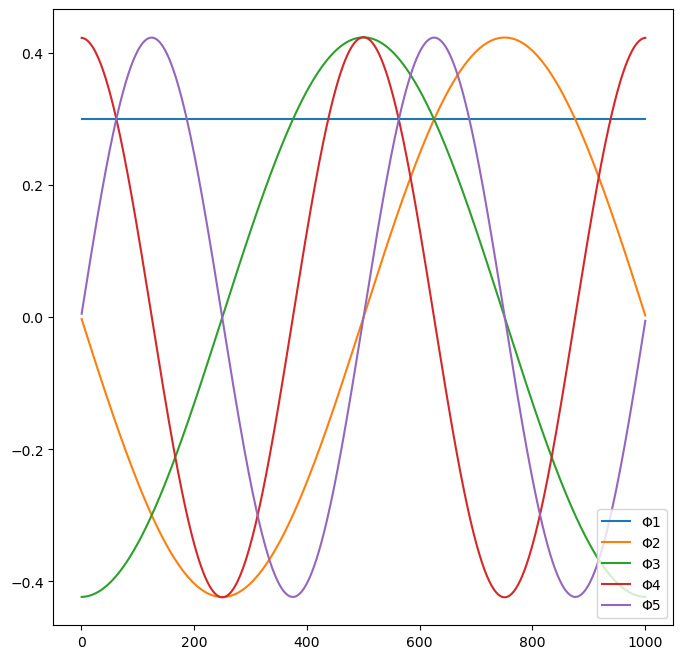

<Figure size 1000x1000 with 0 Axes>

In [3]:
vals, vec = dmap_nn_dist(X, 2, 5)

fig = plt.figure(figsize=(6,6))
plt.plot(tk, vec)

plt.legend(["Φ1", "Φ2", "Φ3", "Φ4", "Φ5"], loc ="lower right")
plt.show()


# TASK 2.2

Importing the Swiss Roll Dataset and visualizing it

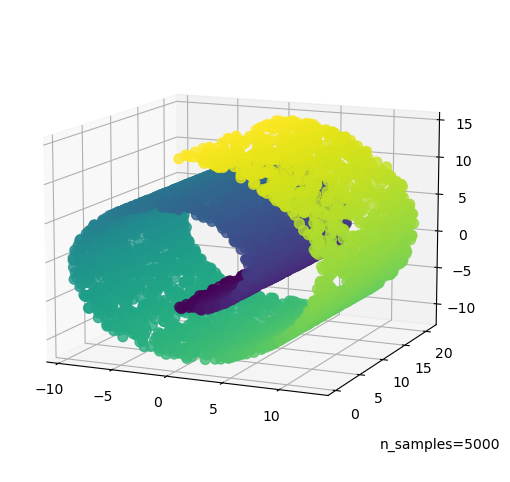

In [4]:
sr_points, sr_color = datasets.make_swiss_roll(n_samples=5000, noise=0.0, random_state=None)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="3d")
fig.add_axes(ax)
ax.scatter(sr_points[:,0], sr_points[:,1], sr_points[:,2], c = sr_color, s = 50, alpha = 0.8)
ax.view_init(azim=-66, elev=12)
_ = ax.text2D(0.8, 0.05, s="n_samples=5000", transform=ax.transAxes)



c:\Users\gaura\anaconda3\lib\site-packages\matplotlib\collections.py:196: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


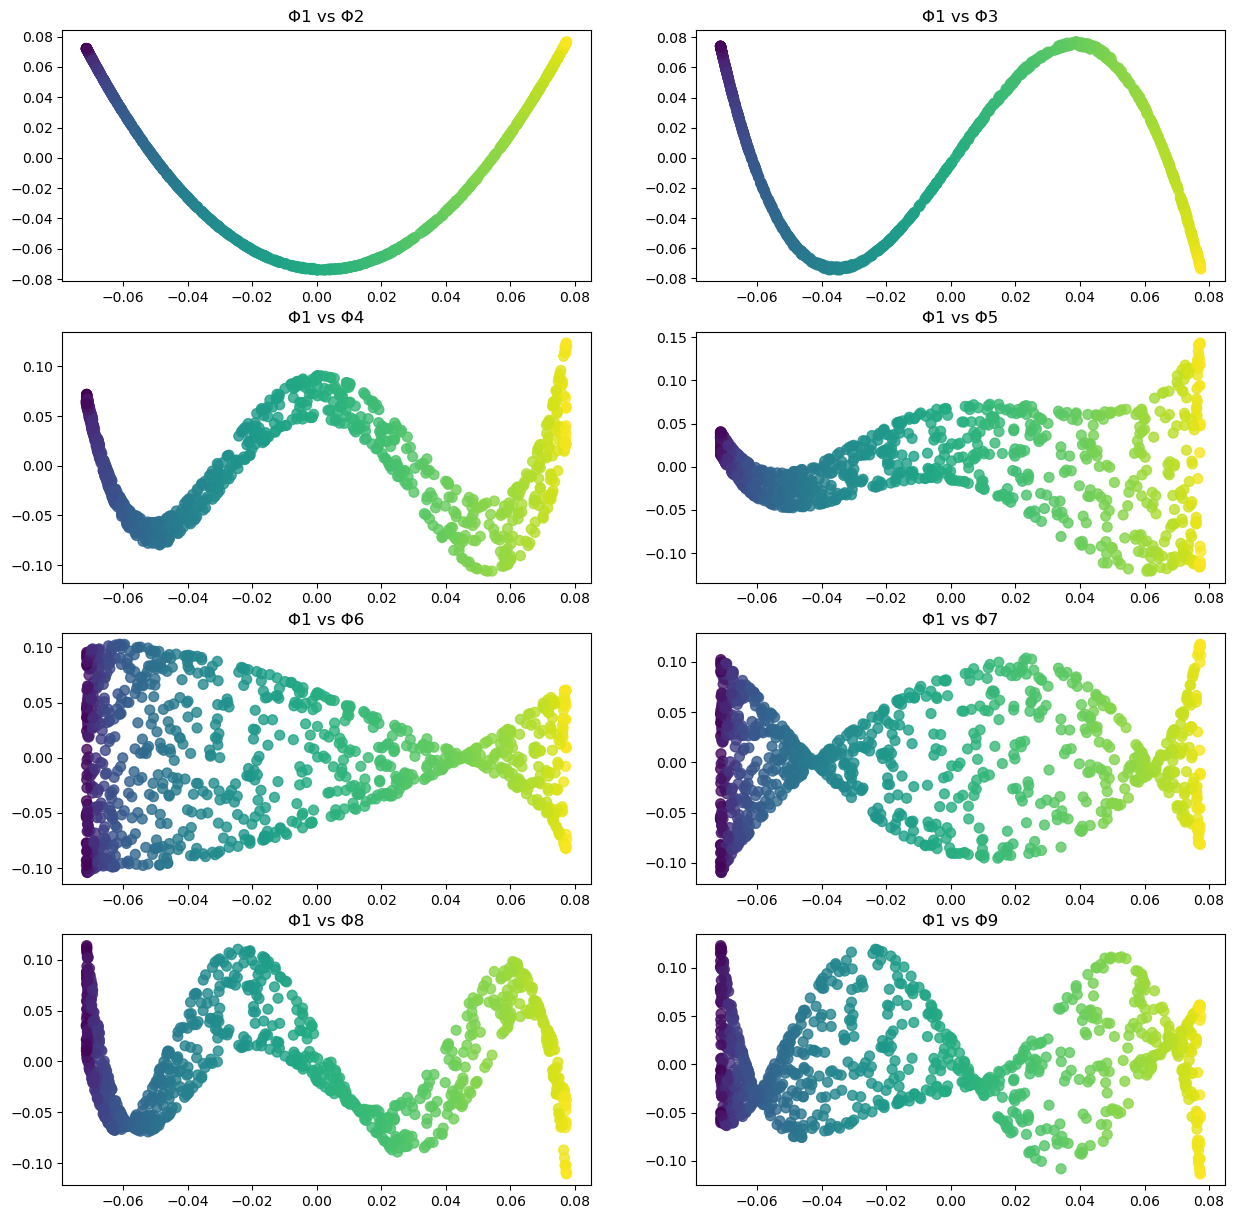

In [5]:
#Reduced points for plotting (change points_plot value)
rng = np.random.default_rng(1)
points_plot = 1000                  
idx_plot = rng.permutation(len(sr_points))[0:points_plot]

vals, vec = dmap_nn_dist(sr_points,40,10)     #Computing Diffusion Map Eigenvectors

j = 1
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(15,15))
for row in ax:
    for col in row:
            j+=1
            col.scatter(vec[idx_plot,1],vec[idx_plot,j],c = sr_color[idx_plot], s = 50, alpha = 0.8)
            col.title.set_text('Φ1 vs Φ%i' %j)
            
plt.show()


Computing principal components using PCA

No of principal components needed to incur max. 10 percent loss is  3


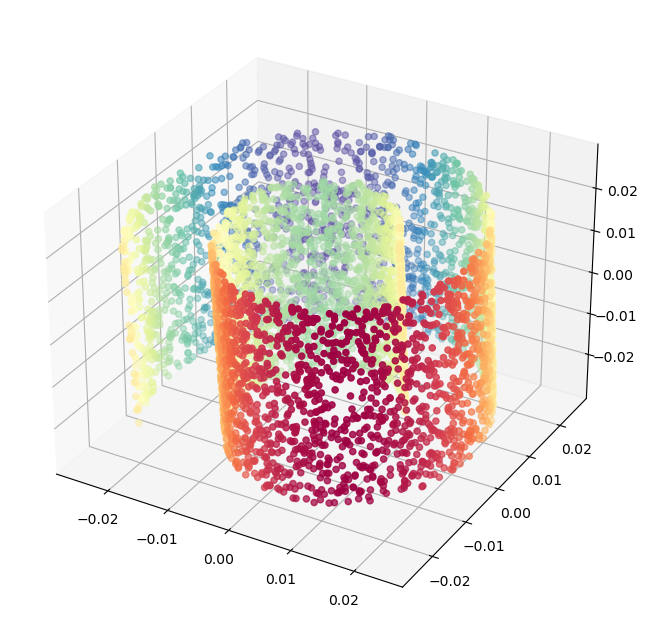

In [6]:
from pca import PCA

comp = PCA(sr_points)
U, S, _ = comp.svd(full_matrices=False)
print("No of principal components needed to incur max. 10 percent loss is ",comp.energy_loss(0.1))

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(U[:, 0], U[:, 1], U[:, 2], c=sr_points[:, 0], cmap=plt.cm.Spectral)

# TASK 2.3

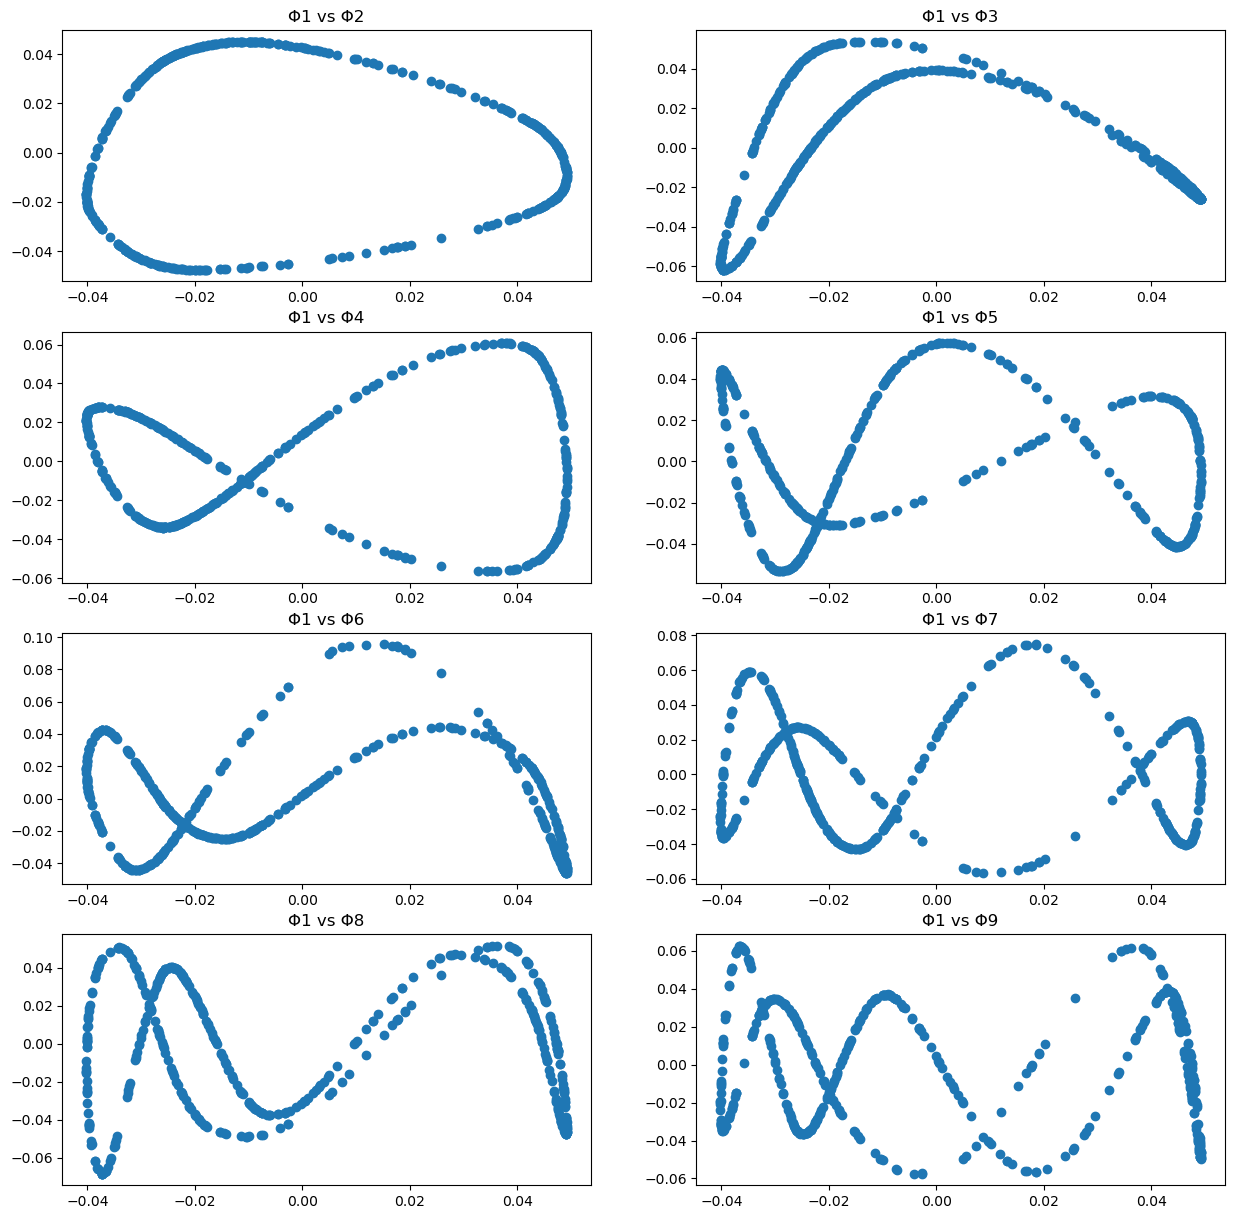

In [7]:
traj = np.loadtxt('data_DMAP_PCA_vadere.txt')

#Plotting with reduced points
rng = np.random.default_rng(1)
points_plot = 500                  
idx_plot = rng.permutation(len(traj))[0:points_plot]

vals, vec = dmap_nn_dist(traj, 10.0, 10)    #Computing Diffusion Map eigenvectors for trajectory

j = 1
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(15,15))
for row in ax:
    for col in row:
        j +=1
        col.scatter(vec[idx_plot,1],vec[idx_plot,j])
        col.title.set_text('Φ1 vs Φ%i' %j)

plt.show()

# TASK 2 Bonus: Diffusion Map of Swiss Roll using Datafold

Importing Required packages

In [8]:
import mpl_toolkits.mplot3d.axes3d as p3

import datafold.dynfold as dfold
import datafold.pcfold as pfold
from datafold.dynfold import LocalRegressionSelection
from datafold.utils.plot import plot_pairwise_eigenvector

Optimize kernel parameters

In [9]:
X_pcm = pfold.PCManifold(sr_points)
X_pcm.optimize_parameters()

print(f"epsilon={X_pcm.kernel.epsilon}, cut-off={X_pcm.cut_off}")

epsilon=0.605337284347778, cut-off=3.339270108479027


Fit Diffusion Maps

(<Figure size 1200x1200 with 10 Axes>,
 array([[<AxesSubplot:title={'center':'$\\Psi_{1}$ vs. $\\Psi_{0}$'}>,
         <AxesSubplot:title={'center':'$\\Psi_{1}$ vs. $\\Psi_{2}$'}>],
        [<AxesSubplot:title={'center':'$\\Psi_{1}$ vs. $\\Psi_{3}$'}>,
         <AxesSubplot:title={'center':'$\\Psi_{1}$ vs. $\\Psi_{4}$'}>],
        [<AxesSubplot:title={'center':'$\\Psi_{1}$ vs. $\\Psi_{5}$'}>,
         <AxesSubplot:title={'center':'$\\Psi_{1}$ vs. $\\Psi_{6}$'}>],
        [<AxesSubplot:title={'center':'$\\Psi_{1}$ vs. $\\Psi_{7}$'}>,
         <AxesSubplot:title={'center':'$\\Psi_{1}$ vs. $\\Psi_{8}$'}>],
        [<AxesSubplot:title={'center':'$\\Psi_{1}$ vs. $\\Psi_{9}$'}>,
         <AxesSubplot:>]], dtype=object))

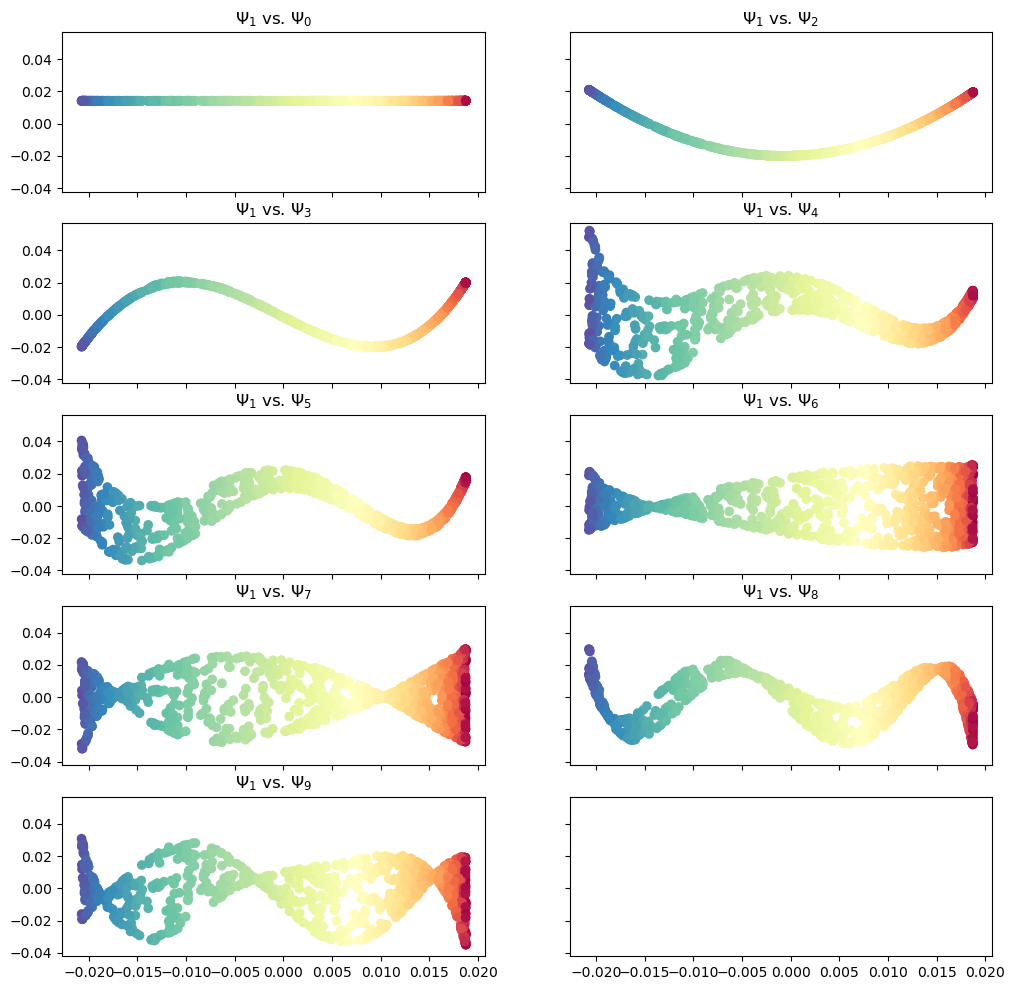

In [10]:
rng = np.random.default_rng(1)

dmap = dfold.DiffusionMaps(kernel=pfold.GaussianKernel(
        epsilon=X_pcm.kernel.epsilon, distance=dict(cut_off=X_pcm.cut_off)
    ),
    n_eigenpairs=10,
)
dmap = dmap.fit(X_pcm)
evecs, evals = dmap.eigenvectors_, dmap.eigenvalues_
idx_plot = rng.permutation(1000)[0:1000]
plot_pairwise_eigenvector(
    eigenvectors=evecs[idx_plot, :],
    n=1,
    fig_params=dict(figsize=[12, 12]),
    scatter_params=dict(cmap=plt.cm.Spectral, c=sr_color[idx_plot]),
)

Selection of best embedding space

In [11]:
selection = LocalRegressionSelection(
    intrinsic_dim=2, n_subsample=500, strategy="dim"
).fit(dmap.eigenvectors_)
print(f"Found parsimonious eigenvectors (indices): {selection.evec_indices_}")

Found parsimonious eigenvectors (indices): [1 4]
